In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import animation
import scipy
import random

In [50]:
Lx, Ly = 1, 1
Nx, Ny = 10, 10
T = 0.1
Nt = 100
a = 10

x_mesh = np.linspace(0, Lx, Nx + 1)
dx_mesh = x_mesh[1] - x_mesh[0]
y_mesh = np.linspace(0, Ly, Ny + 1)
dy_mesh = y_mesh[1] - y_mesh[0]
t_mesh = np.linspace(0, T, Nt + 1)
dt_mesh = t_mesh[1] - t_mesh[0]
Fx = a * dt_mesh / dx_mesh ** 2
Fy = a * dt_mesh / dy_mesh ** 2

K = 500
def G(E):
    return 1 / (1 + (E / K ** 2))


In [51]:
def I(x, y):
    return (1 if (0.25 < x < 0.75) and (0.25 < y < 0.75) else 0)
#     return random.random()

# Set initial condition
u = np.zeros((Nx + 1, Ny + 1, Nt + 1))
for x in range(0, Nx + 1):
    for y in range(0, Ny + 1): 
        u[x, y, 0] = I(x_mesh[x], y_mesh[y])

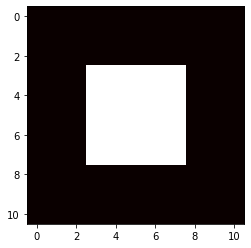

In [52]:
%matplotlib inline
from IPython.display import HTML

anim_len = 10000
anim_interval = anim_len / Nt

fig = plt.figure()
ax = plt.subplot(1, 1, 1)
l = ax.imshow(u[..., 0], cmap="hot")

def animate(i):
    y = u[..., i]
    l.set_data(y)
    return l,

In [53]:
for t in range(0, Nt):
    grad_u = np.gradient(u[..., t], dx_mesh, dy_mesh)
    c = G(grad_u[0] ** 2 + grad_u[1] ** 2)
    grad_c = np.gradient(c, dx_mesh, dy_mesh)
    for x in range(1, Nx):
        for y in range(1, Ny):
            u[x, y, t + 1] = u[x, y, t] + c[x, y] * dt_mesh * (
                (u[x + 1, y, t] + u[x - 1, y, t] - 2 * u[x, y, t]) / (dx_mesh ** 2) + \
                (u[x, y + 1, t] + u[x, y - 1, t] - 2 * u[x, y, t]) / (dy_mesh ** 2)
            ) + (grad_c[0][x, y] * grad_u[0][x, y] + grad_c[1][x, y] * grad_u[1][x, y])
    

In [54]:
anim = animation.FuncAnimation(fig, animate, frames=Nt, interval=anim_interval, blit=True)
HTML(anim.to_jshtml())